In [118]:
#importing necessary libraries for data processing

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
#Reading Data files
data=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_train.csv')
data_2=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_test.csv')
data.isna().sum()
#There are no NaN values

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [120]:


#for train data
ID=data.pop('Client_ID')   #not a feature
balance=data.pop('Balance_Limit_V1')

#for given test data
ID_2=data_2.pop('Client_ID')
balance_2=data_2.pop('Balance_Limit_V1')

In [121]:
#converting 100M,K values to integers
#for train data
for i in range (len(balance)):
    if balance[i][-1]=='M':
        balance[i]=float(balance[i][:-1])*1000000
    elif balance[i][-1]=='K':
        balance[i]=float(balance[i][:-1])*1000
    else:
         balance[i]=float(balance[i])*1
balance=pd.to_numeric(balance)
data=pd.concat([data,balance],axis=1)


#for test data
for i in range (len(balance_2)):
    if balance_2[i][-1]=='M':
        balance_2[i]=float(balance_2[i][:-1])*1000000
    elif balance_2[i][-1]=='K':
        balance_2[i]=float(balance_2[i][:-1])*1000
    else:
         balance_2[i]=float(balance_2[i])*1
balance_2=pd.to_numeric(balance_2)
data_2=pd.concat([data_2,balance_2],axis=1)
        
                    

In [122]:
#getting Dummies for gender,   M=1,F=0
#train data
gender_dummies=pd.get_dummies(data['Gender'],drop_first=True)
gender=data.pop('Gender')
data=pd.concat([data,gender_dummies],axis=1)

#test data
gender_dummies_2=pd.get_dummies(data_2['Gender'],drop_first=True)
gender_2=data_2.pop('Gender')
data_2=pd.concat([data_2,gender_dummies_2],axis=1)

In [123]:
#getting dummies for Educational Status ['GRADUATE','HIGH SCHOOL','OTHER_1']

#for train Data
edu_dummies=pd.get_dummies(data['EDUCATION_STATUS'])
edu_dummies.columns = ['GRADUATE','HIGH SCHOOL','OTHER_1']
eduation=data.pop('EDUCATION_STATUS')
data=pd.concat([data,edu_dummies],axis=1)

#for Test Data
edu_dummies_2=pd.get_dummies(data_2['EDUCATION_STATUS'])
edu_dummies_2.columns = ['GRADUATE','HIGH SCHOOL','OTHER_1']
eduation_2=data_2.pop('EDUCATION_STATUS')
data_2=pd.concat([data_2,edu_dummies_2],axis=1)

In [124]:
#getting dummies for MARITAL_STATUS

#for train Data
marital_dummies=pd.get_dummies(data['MARITAL_STATUS'])
marital_status=data.pop('MARITAL_STATUS')
data=pd.concat([data,marital_dummies],axis=1)

#for test Data
marital_dummies_2=pd.get_dummies(data_2['MARITAL_STATUS'])
marital_status_2=data_2.pop('MARITAL_STATUS')
data_2=pd.concat([data_2,marital_dummies_2],axis=1)

In [125]:
#getting dummies for AGE

#for train Data
age_dummies=pd.get_dummies(data['AGE'],drop_first=True)
age=data.pop('AGE')
data=pd.concat([data,age_dummies],axis=1)

#for test Data
age_dummies_2=pd.get_dummies(data_2['AGE'],drop_first=True)
age_2=data_2.pop('AGE')
data_2=pd.concat([data_2,age_dummies_2],axis=1)

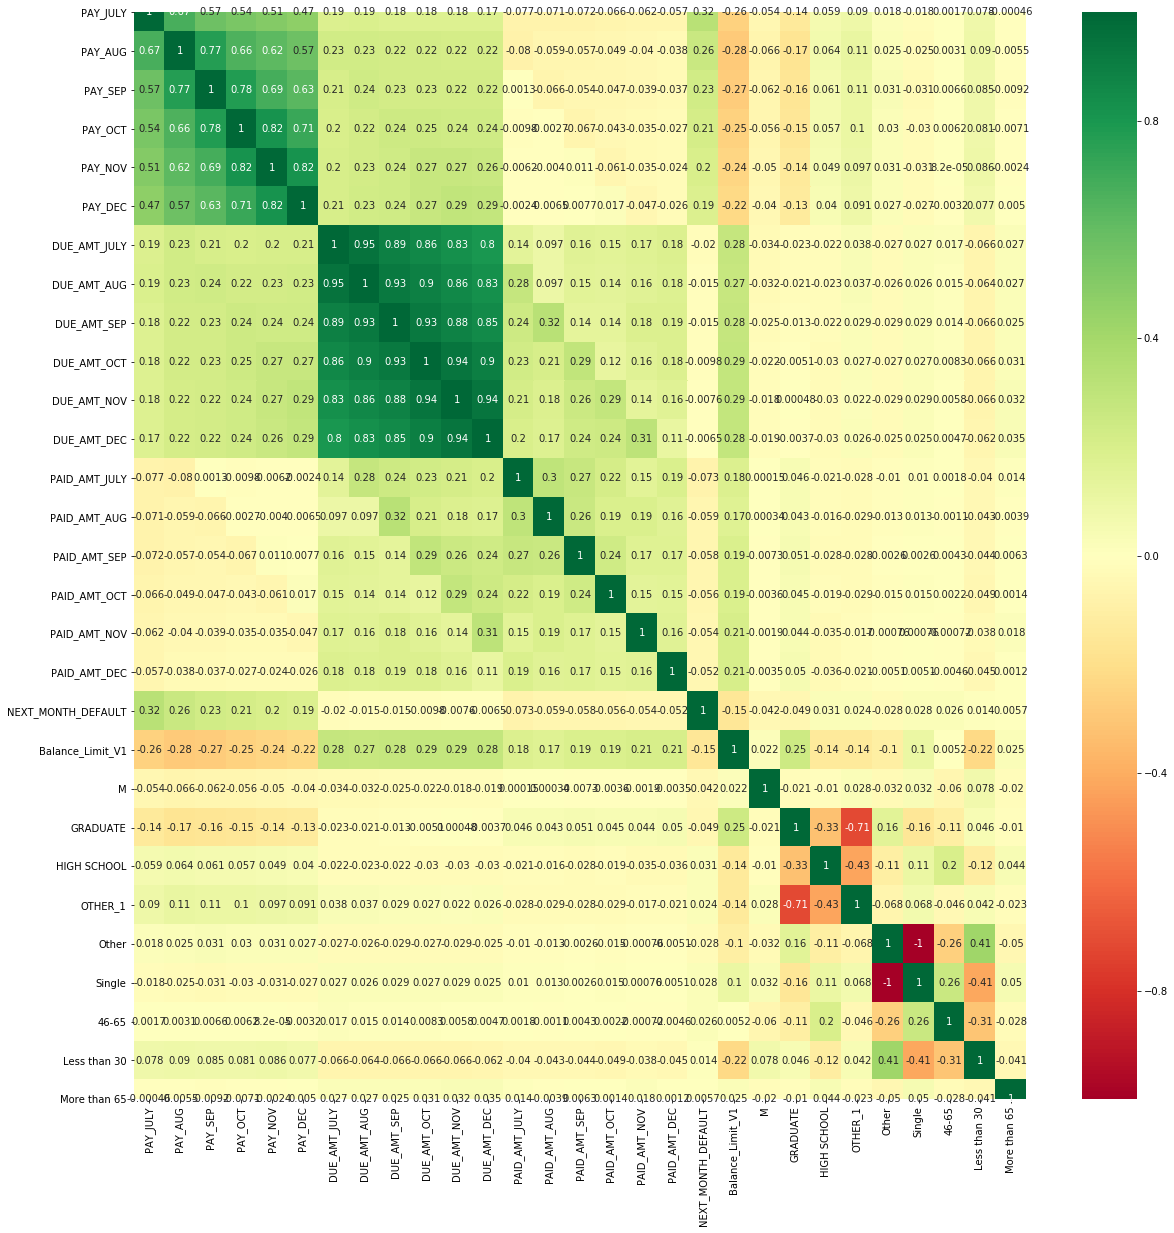

In [126]:
#Heatmap
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [127]:
#separating Labels data field
Labels=data.pop('NEXT_MONTH_DEFAULT')

In [128]:
#Machine Learning Model training part

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost

In [129]:
#Spliting the given train data set into train_data and Validation data
train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size = 0.2,random_state = 100)

Train accuracy
0.8278125
Test accuracy
0.8220833333333334
F1-Score
0.47413793103448276
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3773
           1       0.64      0.37      0.47      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.66      0.68      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3561  212]
 [ 642  385]]
Feature Importance
[0.42207164 0.12520036 0.03029468 0.0298997  0.03669624 0.02392277
 0.01905766 0.01554871 0.01394217 0.01127507 0.01402053 0.01520271
 0.01742971 0.03173725 0.02910228 0.01619227 0.01439168 0.01308808
 0.02362596 0.0139868  0.0108807  0.01499511 0.01304045 0.01273679
 0.         0.01537395 0.01628675 0.        ]


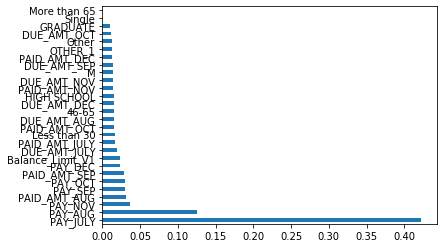

In [130]:
#XGB boost classifier approach
clf = DecisionTreeClassifier(max_depth=6)
model=xgboost.XGBClassifier(base_estimator=clf,max_depth=6,n_estimators=75,objective='binary:logistic',gamma=8.1,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label)
y_predict=model.predict(test_data)
print("Train accuracy")
print(format(model.score(train_data,train_label)))
print("Test accuracy")
print(format(model.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

#Feature Importance in XGB boost classifier
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [131]:
submit=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/submit.csv')
submit.pop('NEXT_MONTH_DEFAULT')
predic=model.predict(data_2)
print(predic[0:100])
result=pd.DataFrame(predic,columns=['NEXT_MONTH_DEFAULT'])
submit=pd.concat([submit,result],axis=1)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
export_csv=submit.to_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_test.csv')

Additionals

Train accuracy
0.8270833333333333
Test accuracy
0.8197916666666667
F1-Score
0.46306641837368095
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3773
           1       0.64      0.36      0.46      1027

    accuracy                           0.82      4800
   macro avg       0.74      0.65      0.68      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3562  211]
 [ 654  373]]
Feature Importance
[0.63339864 0.13497783 0.00753929 0.00378905 0.02131116 0.02458748
 0.02935898 0.00998377 0.0010944  0.         0.00285524 0.00951756
 0.00156883 0.01444213 0.0575936  0.00451667 0.00579176 0.00370603
 0.0248133  0.00334936 0.         0.         0.         0.
 0.00092683 0.         0.00258484 0.00229325]


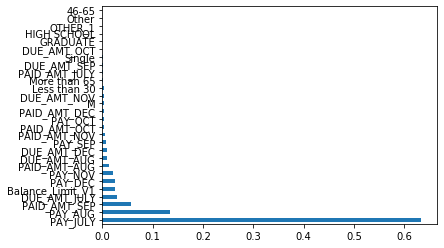

In [132]:
#Decision Tree Classifier model approach

clf = DecisionTreeClassifier(max_depth=6).fit(train_data,train_label)

y_predict=clf.predict(test_data)
print("Train accuracy")
print(format(clf.score(train_data,train_label)))
print("Test accuracy")
print(format(clf.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))


#Feature Importance in Decision Tree Classifier
print("Feature Importance")
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()